## **Preprocesamiento: Utilizando el conjunto de datos MNIST realiza el preprocesamiento necesario para escalar los valores de pixeles entre -1 y 1**



In [109]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import layers,models
import tensorflow as tf
(train_images, _), (_ , _) = tf.keras.datasets.mnist.load_data()

In [110]:
from tensorflow.python import train
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
train_images =(train_images - 127.5)/127.5
# la escala de valores entre -1 a 1 es para que los datos esten centrales al cero por el tipo de activacion es mejor para trabajar con estos modelos

## **Definición del generador y el discriminador: Definir las arquitecturas del generador y del discriminador. (Utilizando métodos que permitan fácilmente justificar la elección de cada arquitectura).**

In [121]:
#generador
def build_generator(latent_dim):#ruido
  model = models.Sequential()
  model.add(layers.Dense(7 *7 *128,input_dim =latent_dim))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Reshape((7,7,128)))
  model.add(layers.Conv2DTranspose(64,(4,4),strides=(2,2),  padding ='same'))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Conv2DTranspose(1,(4,4),strides=(2,2),padding='same',activation='tanh'))
  return model

In [112]:
#Discriminador
def build_discriminator():
 model = models.Sequential()
 model.add(layers.Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=(28,28,1)))
 model.add(layers.LeakyReLU(alpha=0.2))
 model.add(layers.Dropout(0.4))
 model.add(layers.Conv2D(128,(3,3),strides=(2,2),padding='same'))
 model.add(layers.LeakyReLU(alpha=0.2))
 model.add(layers.Dropout(0.4))
 model.add(layers.Flatten())
 model.add(layers.Dense(1, activation='sigmoid'))
 return model

In [ ]:
from tensorflow.python.training.saver import metrics
from tensorflow.python.training import optimizer
#Definicion de las dimensiones
latent_dim =100

#construccion y compilacion del discriminador
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])# un optimizador sirve para optimizar los parametros adam, entrega la precision

#construccion y compilacion del generador
generador = build_generator(latent_dim)


## **Implementación de la GAN: Construya la red GAN combinando el generador y el discriminador, utilizando las funciones de perdida y optimizador adecuados.**

In [114]:
# contruccion de la red GAN
discriminator.trainable = False #congele la configuracion
gan_input = tf.keras.Input(shape=(latent_dim,)) # entrada del modelo- espacio latente
x= generador(gan_input)# se le pasa el espacio latente / imagen sintetica es lo que sale
gan_output = discriminator(x)# lo que sale del generador entra al discriminador
gan = tf.keras.Model(gan_input,gan_output)# va a definir el modelo espacio latente y la salida (gan_output)
gan.compile(loss ='binary_crossentropy',optimizer='adam')# se compila funcion de perdida entropia binaria

## **Entrenamiento: Entrene la red durante 10000 épocas y utilice un espacio latente igual a 100.**

In [115]:
#Entrenamiento
batch_size = 128
epochs = 10000
sample_interval = 407 # codigo estudiante 201910407

## **Visualización del progreso: utilizando los tres últimos dígitos de su código estudiantil como intervalo, haga que su implementación genere ejemplos (muestras) que permitan observar el progreso del entrenamiento.**

4/4 [==============================] - 0s 2ms/step
Epoch 0,D loss: 0.719808429479599, G loss: 0.6820260286331177
4/4 [==============================] - 0s 2ms/step


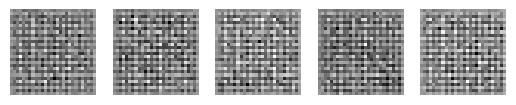

4/4 [==============================] - 0s 3ms/step
Epoch 407,D loss: 0.30165308713912964, G loss: 3.602344036102295
4/4 [==============================] - 0s 3ms/step


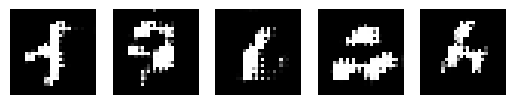

4/4 [==============================] - 0s 3ms/step
Epoch 814,D loss: 0.4859994649887085, G loss: 2.1065633296966553
4/4 [==============================] - 0s 4ms/step


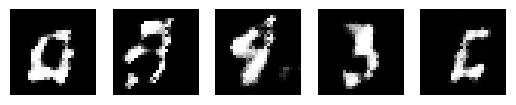

4/4 [==============================] - 0s 2ms/step
Epoch 1221,D loss: 0.5121330171823502, G loss: 1.4678505659103394
4/4 [==============================] - 0s 2ms/step


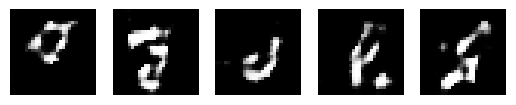

4/4 [==============================] - 0s 3ms/step
Epoch 1628,D loss: 0.4972720891237259, G loss: 1.6718595027923584
4/4 [==============================] - 0s 2ms/step


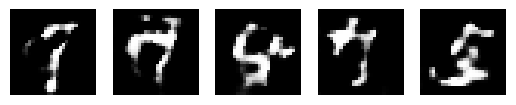

4/4 [==============================] - 0s 3ms/step
Epoch 2035,D loss: 0.5330849289894104, G loss: 1.5782620906829834
4/4 [==============================] - 0s 2ms/step


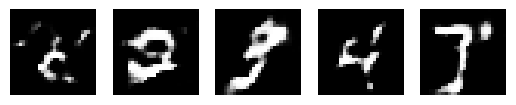

4/4 [==============================] - 0s 3ms/step
Epoch 2442,D loss: 0.3783079981803894, G loss: 1.8155810832977295
4/4 [==============================] - 0s 3ms/step


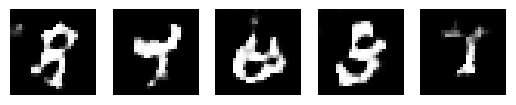

4/4 [==============================] - 0s 4ms/step
Epoch 2849,D loss: 0.6237408518791199, G loss: 1.2955873012542725
4/4 [==============================] - 0s 3ms/step


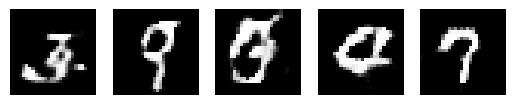

4/4 [==============================] - 0s 4ms/step
Epoch 3256,D loss: 0.4400893300771713, G loss: 1.6885364055633545
4/4 [==============================] - 0s 4ms/step


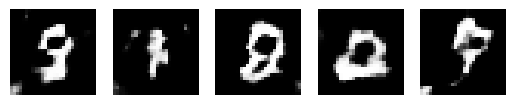

4/4 [==============================] - 0s 2ms/step
Epoch 3663,D loss: 0.4333067387342453, G loss: 2.1541879177093506
4/4 [==============================] - 0s 3ms/step


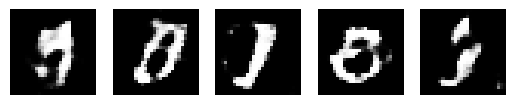

4/4 [==============================] - 0s 4ms/step
Epoch 4070,D loss: 0.43963663280010223, G loss: 1.868523359298706
4/4 [==============================] - 0s 4ms/step


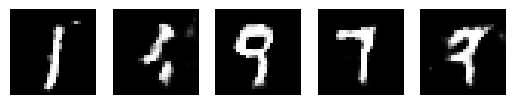

4/4 [==============================] - 0s 3ms/step
Epoch 4477,D loss: 0.6236243844032288, G loss: 1.332183599472046
4/4 [==============================] - 0s 2ms/step


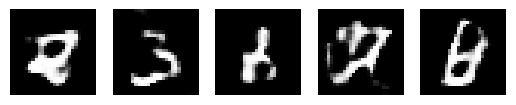

4/4 [==============================] - 0s 3ms/step
Epoch 4884,D loss: 0.5085170865058899, G loss: 1.6404911279678345
4/4 [==============================] - 0s 4ms/step


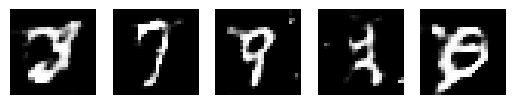

4/4 [==============================] - 0s 3ms/step
Epoch 5291,D loss: 0.5142392963171005, G loss: 1.3079833984375
4/4 [==============================] - 0s 3ms/step


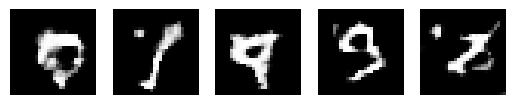

4/4 [==============================] - 0s 4ms/step
Epoch 5698,D loss: 0.4889177680015564, G loss: 1.436597466468811
4/4 [==============================] - 0s 4ms/step


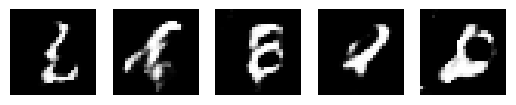

4/4 [==============================] - 0s 5ms/step
Epoch 6105,D loss: 0.5445196032524109, G loss: 1.6762688159942627
4/4 [==============================] - 0s 3ms/step


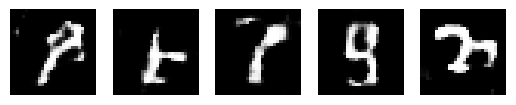

4/4 [==============================] - 0s 5ms/step
Epoch 6512,D loss: 0.5444320738315582, G loss: 1.3327817916870117
4/4 [==============================] - 0s 2ms/step


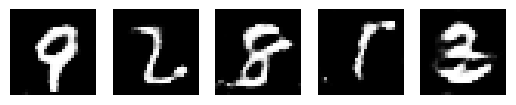

4/4 [==============================] - 0s 4ms/step
Epoch 6919,D loss: 0.4322689324617386, G loss: 1.4286454916000366
4/4 [==============================] - 0s 4ms/step


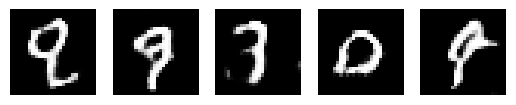

4/4 [==============================] - 0s 3ms/step
Epoch 7326,D loss: 0.48306557536125183, G loss: 1.3651349544525146
4/4 [==============================] - 0s 2ms/step


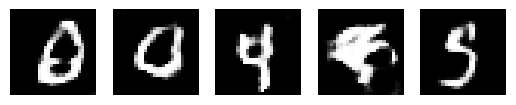

4/4 [==============================] - 0s 3ms/step
Epoch 7733,D loss: 0.5560689866542816, G loss: 1.3025898933410645
4/4 [==============================] - 0s 2ms/step


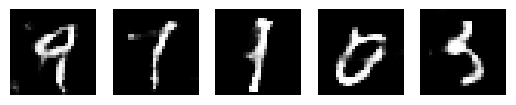

4/4 [==============================] - 0s 5ms/step
Epoch 8140,D loss: 0.49233725666999817, G loss: 1.4651196002960205
4/4 [==============================] - 0s 3ms/step


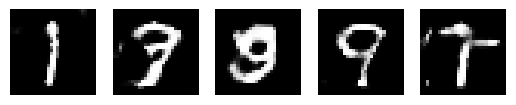

4/4 [==============================] - 0s 3ms/step
Epoch 8547,D loss: 0.5964439809322357, G loss: 1.2195699214935303
4/4 [==============================] - 0s 3ms/step


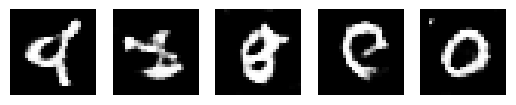

4/4 [==============================] - 0s 4ms/step
Epoch 8954,D loss: 0.5906452238559723, G loss: 1.361594557762146
4/4 [==============================] - 0s 3ms/step


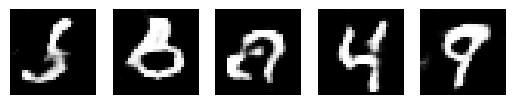

4/4 [==============================] - 0s 5ms/step
Epoch 9361,D loss: 0.5883324146270752, G loss: 1.2878609895706177
4/4 [==============================] - 0s 4ms/step


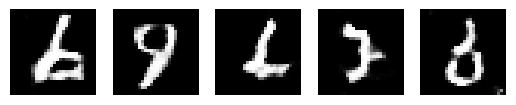

4/4 [==============================] - 0s 5ms/step
Epoch 9768,D loss: 0.4658583700656891, G loss: 1.4658006429672241
4/4 [==============================] - 0s 3ms/step


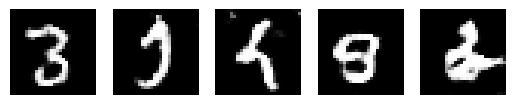

4/4 [==============================] - 0s 5ms/step


In [116]:
from tensorflow.python.ops.gen_batch_ops import batch
vec_d_loss = []
vec_g_loss = []
for epoch in range(epochs):
  #entrenamiento del discriminador
  idx= np.random.randint(0,train_images.shape[0],batch_size)
  real_images = train_images[idx]
  noise = np.random.normal(0,1,(batch_size,latent_dim))
  generated_images = generador.predict(noise)
  real_labels =np.ones((batch_size, 1))
  fake_labels = np.zeros((batch_size, 1))

  d_loss_real = discriminator.train_on_batch(real_images,real_labels) #train_on_batch modo entrenamiento por lotes
  d_loss_fake = discriminator.train_on_batch(generated_images,fake_labels)
  d_loss = 0.5 * np.add(d_loss_real,d_loss_fake)

  #entrenamiento del generador
  noise = np.random.normal(0,1, (batch_size, latent_dim))
  g_loss = gan.train_on_batch(noise, real_labels) #funcion de perdida / que tanto el ruido se parece a lo real

  # Se guarda los errores para luego graficar
  vec_d_loss.append(d_loss[0])
  vec_g_loss.append(g_loss)
  #se imprimen las imagenes segun el numero del codigo de estudiante
  if epoch % sample_interval == 0:
    print(f'Epoch {epoch},D loss: {d_loss[0]}, G loss: {g_loss}')
    # generar imagenes de ejemplo
    generated_images =generador.predict(noise)
    generated_images =0.5* generated_images + 0.5  # reescalar imagenes a [0,1]
    fig, axs = plt.subplots(1,5)
    for i in range(5):
      axs[i].imshow(generated_images[i,:,:, 0],cmap ='gray')
      axs[i].axis('off')
    plt.show()

## **Análisis de pérdida: Genere las curvas de pérdida del generador y el discriminador a lo largo del entrenamiento, ¿Qué patrones observa? ¿Cómo cambian las perdidas a medida que avanza el entrenamiento?**

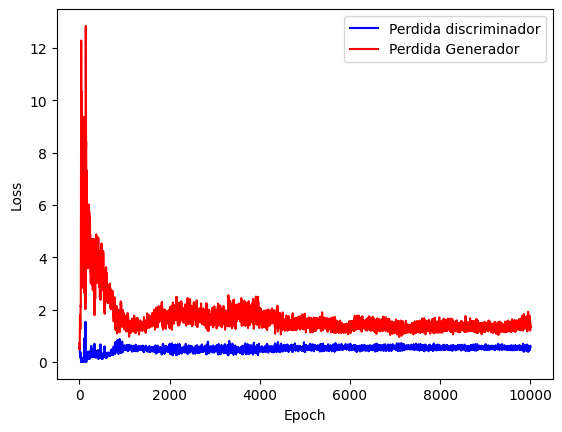

In [117]:
import matplotlib.pyplot as plt

plt.plot(vec_d_loss, label='Perdida discriminador', color='blue')
plt.plot(vec_g_loss, label='Perdida Generador', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Exploración del espacio latente: Seleccione una imagen generada y experimenten con la modificación de valores en el espacio latente. ¿Cómo cambian las imágenes generadas al ajustar ciertas dimensiones del espacio latente?**

In [118]:
noise_test = np.random.normal(0,1,(128,100))

4/4 [==============================] - 0s 2ms/step


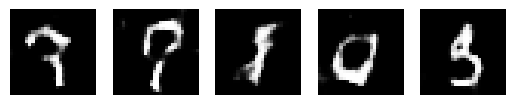

In [119]:
generated_images =generador.predict(noise_test)
generated_images =0.5* generated_images + 0.5  # reescalar imagenes a [0,1]
fig, axs = plt.subplots(1,5)
for i in range(5):
 axs[i].imshow(generated_images[i,:,:, 0],cmap ='gray')
 axs[i].axis('off')
plt.show()

4/4 [==============================] - 0s 3ms/step


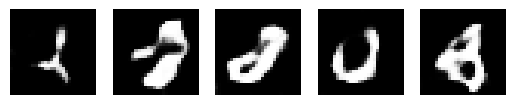

In [120]:
noise_test[:, ::2] = 1.0000001
generated_images =generador.predict(noise_test)
generated_images =0.5* generated_images + 0.5  # reescalar imagenes a [0,1]
fig, axs = plt.subplots(1,5)

for i in range(5):
 axs[i].imshow(generated_images[i,:,:, 0],cmap ='gray')
 axs[i].axis('off')
plt.show()